### Autor(es): Andrei Silva Santos e Laverty Diderone de Assis Ladeia
Programa de Pós-Graduação em Modelagem Computacional</br></br>
Disciplina: Métodos Numéricos</br></br>
Turma: 2024.1</br></br>
Plataforma:</br></br>
- CPU: 12th Gen Intel(R) Core(TM) i5-12500H, 16 núcleos 4.5 GHz
- Memory: 8GiB 4800 MT/s
- Swap: 16GiB
- GPU: GeForce RTX 3050
- SO: Ubuntu 22.04
- Python 3.10.12
- Driver Version: 550.54.14
- CUDA Version: 12.4

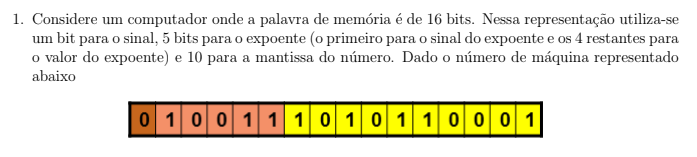

### a) Qual é o número decimal representado?

In [31]:
def binario16_para_decimal(vetor, start_expoente=2, start_mantissa=6):
    sinal = -1 if vetor[0] == 1 else 1 # Guarda o sinal do número
    sinal_expoente = -1 if vetor[1] == 1 else 1 # Guarda o sinal do expoente

    expoente = 0
    for i in range(start_expoente, start_mantissa):
        expoente += vetor[i] * 2 ** (start_mantissa - 1 - i)  # Calculo iterativo do expoente de n bits
    
    if expoente == 0 and sinal_expoente == 1: # Caso Especial para usar o que seria -0
        expoente = -16
    else:
        expoente *= sinal_expoente # Expoente recebe o sinal após conversão

    mantissa = 0
    for i in range(start_mantissa, len(vetor)):
        mantissa += vetor[i] * 2 ** (start_mantissa - 1 - i) # Calculo iterativo da mantissa de n bits

    return sinal * (2 ** expoente) * mantissa

vetor = [0,1,0,0,1,1,1,0,1,0,1,1,0,0,0,1] ### Vetor dado
print("Número decimal representado é:", binario16_para_decimal(vetor))


Número decimal representado é: 0.0841064453125


---
### b) Qual é o número de máquina imediato inferior? Informe seu valor decimal.

In [32]:
vetor_inferior = [0,1,0,0,1,1,1,0,1,0,1,1,0,0,0,0]
print("O número de máquina imediatamente inferior é: ", vetor_inferior)
print("Número decimal imediatamente inferior é: ", binario16_para_decimal(vetor_inferior))

O número de máquina imediatamente inferior é:  [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0]
Número decimal imediatamente inferior é:  0.083984375


---
### c) Qual é o número de máquina imediato superior? Informe seu valor decimal.

In [33]:
vetor_superior = [0,1,0,0,1,1,1,0,1,0,1,1,0,0,1,0]
print("O número de máquina imediatamente superior é: ", vetor_superior)
print("Número imediatamente superior é: ", binario16_para_decimal(vetor_superior))

O número de máquina imediatamente superior é:  [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
Número imediatamente superior é:  0.084228515625


---
### d) Qual o intervalo de números reais que podem ser representados na notacão de 16 bits?

O menor número decimal possível será quando todos os bits da mantissa e do expoente forem 1, considerando que o sinal do expoente seja positivo(0) e o sinal do número negativo(1). 
O maior número decimal possível será quando todos os bits da mantissa e do expoente forem 1, considerando que o sinal do número e do expoente seja positivo(0). 

In [34]:
vetor_inicio_faixa = [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
vetor_final_faixa = [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
print("O menor número real possível de ser representado é: ", binario16_para_decimal(vetor_inicio_faixa))
print("O maior número real possível de ser representado é: ", binario16_para_decimal(vetor_final_faixa))

O menor número real possível de ser representado é:  -32736.0
O maior número real possível de ser representado é:  32736.0


---
### e) Utilize os resultados anteriores para explicar porque apenas um subconjunto dos números reais pode ser representado pelo computador.

Podemos dizer que apenas um subconjunto dos números reais podem ser representados pelo computador devido a limitação de memória que deriva duas outras limitações: representação da mantissa e do expoente.

- Limitação da mantissa: Com 10 bits disponíveis para a mantissa, podemos representar até 2¹⁰ = 1024 diferentes combinações binárias. Isso nos permite representar a parte fracionária dos números com até 10 bits de precisão. No entanto, números que exigem mais de 10 bits para representar sua parte fracionária precisarão ser arredondados ou truncados, resultando em uma perda de precisão.

- Limitação do expoente com sinal: Com 5 bits disponíveis para o expoente (incluindo 1 bit para o sinal do expoente), podemos representar números muito grandes ou muito pequenos, porém um número limitado deles. Com 4 bits disponíveis, podemos representar expoentes de -16 a 15.

Como todos os números de ponto flutuante são representados em uma quantidade finita de bits, há um limite para a precisão e a faixa de valores que podemos representar. Com um total de 16 bits (1 para o sinal, 1 para o sinal do expoente, 10 para a mantissa e 4 para o expoente), estamos limitados a representar números Reais na notação de ponto flutuante em uma faixa específica e com uma precisão limitada. Assim, mesmo com um formato de ponto flutuante de 16 bits, apenas um subconjunto finito e discreto dos números reais pode ser representado com precisão, devido às limitações no tamanho da mantissa e do expoente.

---
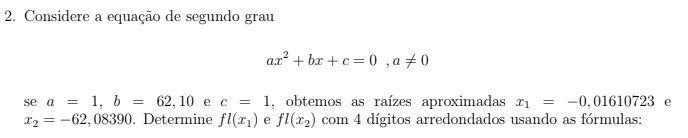

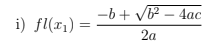

In [35]:
import math

def calcular_raiz_i(a, b, c):
    delta = round(b ** 2, 4) - round(round(4 * a, 4) * c, 4)

    return round((- b + round(math.sqrt(delta), 4)) / round(2 * a, 4), 4)

raiz_i = calcular_raiz_i(1, 0.6210 * (10 ** 2), 1)
print("A Raiz X1 usando i é:", raiz_i)

A Raiz X1 usando i é: -0.0161


---
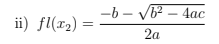

In [36]:
import math

def calcular_raiz_i(a, b, c):
    delta = round(b ** 2, 4) - round(round(4 * a, 4) * c, 4)

    return round((- b - round(math.sqrt(delta), 4)) / round(2 * a, 4), 4)

raiz_i = calcular_raiz_i(1, 0.6210 * (10 ** 2), 1)
print("A Raiz X2 usando ii é:", raiz_i)

A Raiz X2 usando ii é: -62.0839


---
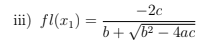

In [38]:
import math

def calcular_raiz_iii(a, b, c):
    delta = round(b ** 2, 4) - round(round(4 * a,4) * c,4)

    return  round(round(-2 * c, 4) / (b + round(math.sqrt(delta),4)), 4) 

print("A Raiz X1 usando iii é: ", calcular_raiz_iii(1, 0.6210 * 10 ** 2, 1))

A Raiz X1 usando iii é:  -0.0161


---
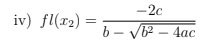

In [ ]:
import math

def calcular_raiz_iii(a, b, c):
    delta = round(b ** 2, 4) - round(round(4 * a,4) * c,4)

    return  round(round(-2 * c, 4) / (b - round(math.sqrt(delta),4)), 4) 

print("A Raiz X1 usando iv é:", calcular_raiz_iii(1, 0.6210 * 10 ** 2, 1))

A Raiz X1 usando iv é: -62.1118


---
### a) Calcule os erros absolutos para cada estimativa.


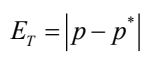

Valores reais = X1: -0,01610723, X2: -62,08390

i - Ea = | -0.01610723 - (-0.0161) | = <b>0.00000723 ou 0.723 x 10<sup>-6</sup></b>

ii - Ea = | -62.08390 - (-62.0839) | = <b>0</b>

iii - Ea = | -0.01610723 - (-0.0161) | = <b>0.00000723 ou 0.723 x 10<sup>-6</sup></b>

iv - Ea = | -62.08390 - (-62.1118) | = <b>0.0279 ou 0.279 X 10<sup>-1</sup></b>

---
### b) Calcule os erros relativos para cada estimativa.

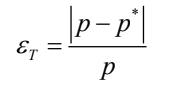

Valores reais = X1: -0,01610723, X2: -62,08390

i   - Er = | -0.01610723 - (-0.0161) | /  -0.01610723 = <b>−0.0004488668 ou −0.4488668 x 10⁻³</b>

ii  - Er = | -62.08390 - (-62.0839) | / -62.08390 = <b>0</b>

iii - Er = | -0.01610723 - (-0.0161) | /  -0.01610723 = <b>−0.0004488668 ou −0.4488668 x 10⁻³</b>

iv  - Er = | -62.08390 - (-62.1118) | / -62.08390 = <b>−0.0004493919 ou −0.4493919 x 10⁻³</b>

---
### c) Considerando os resultados de (a) e (b) qual definição de erro é mais apropriada? Justifique.

Neste contexto, dados os resultados encontrados e o escopo do problema, a métrica **erro relativo** é levemente preferível por expressar o erro em relação ao tamanho do valor verdadeiro, sem considerar a grandeza dos valores envolvidos. Porém não podemos descartar totalmente a métrica do erro absoluto pois ela pode ser útil quando estamos mais interessado na magnitude pura do erro. Em conclusão, o erro relativo é mais útil para comparar os dois métodos propostos que calculam as raizes de uma funcão polinomial de segundo grau, principalmente quando as grandezes são pequenas. Mas não podemos descarta totalmente a métrica do erro absoluto que pode ser útil para se ter uma compreensão mais completa do desempenho ou acurária e precisão do método número aplicado.

---
### d) Se compararmos os resultados obtidos pelas expressoes (i) e (ii), com os das expressões (iii) e (iv). Porque os resultados são diferentes? Qual das alternativas devemos utilizar?

Os resultados são diferentes devido ao arredondamento dos resultados das operações intermediárias conjuntamente com a diferença de ordem em que essas são realizadas, principalmente as de divisão e multiplicação. As alternativas i e ii para resolução de raízes de uma equação de 2° grau se mostraram melhores opções para o problema proposto pois o seu erro relativo e absoluto são iguais ou menores em comparação com as alternativas iii e iv.

___
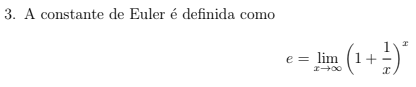

### a) Utilize a definição anterior para calcular estimativas de e para x = {10⁰ , 10¹ , 10² , 10³ , . . . , 10³²}.

In [ ]:
import cupy as cp

def lim_const_euler(x):
    # Inicializa o vetor auxiliar com 1 na GPU
    vetor_auxiliar = cp.ones_like(x, dtype=cp.float64)

    # Calcula os fatoriais e preenche o vetor auxiliar na GPU
    cp.cumprod(cp.arange(2, x.size), out=vetor_auxiliar[2:])

    # Calcula a série infinita usando o vetor auxiliar na GPU
    euler_estimado = cp.sum(1 / vetor_auxiliar)

    return euler_estimado

def calcula_euler_ate(x):
    for i in range(x + 1):
        valores = cp.arange(1, 10 ** i + 1)  # Cria um array de 1 até 10^i
        cp.get_default_memory_pool().free_all_blocks() ## Liberando memoria após calculo de !10^i+1
        euler_atual = lim_const_euler(valores)  # Calcula Euler para cada valor
        vetor_resultados_euler.append(euler_atual.get())  # Obtem o resultado da GPU
        print(f"O número de Euler com x = 10^{i} é:", euler_atual.get())

    return vetor_resultados_euler

vetor_resultados_euler = []
calcula_euler_ate(32)

O número de Euler com x = 10^0 é: 1.0
O número de Euler com x = 10^1 é: 2.718281525573192
O número de Euler com x = 10^2 é: 2.7182818284590446
O número de Euler com x = 10^3 é: 2.7182818284590446
O número de Euler com x = 10^4 é: 2.7182818284590446
O número de Euler com x = 10^5 é: 2.7182818284590446
O número de Euler com x = 10^6 é: 2.7182818284590446
O número de Euler com x = 10^7 é: 2.7182818284590446
O número de Euler com x = 10^8 é: 2.7182818284590446


OutOfMemoryError: Out of memory allocating 8,000,000,000 bytes (allocated so far: 800,001,024 bytes).

A primeira versão do código acima usava a biblioteca padrão do python e o módulo ```math``` para o cálculo da estimativa do número de Euler. Porém após 1 hora executando a CPU somente conseguiu calcular até a 5° iteração(10⁴). Para tentar explorar melhor os recursos de hardware disponíveis mudamos o código para usar o módulo [cupy](https://cupy.dev/) que otimiza o cálculo de números grandes utilizando a GPU. 

Embora usando recursos mais robustos o código final não conseguiu ir muito mais longe, mas por outro motivo: **o estouro da memória**. Como pode ser visto na saída a memória primária se esgotou na 9° iteração(10⁸). Mas podemos observar que a partir da 3° iteração a aproximação alcançou o limite de representação do float do python, não havendo espaço para maior aproximação da estimativa. O que aprendemos é que em algumas situação o desafio é saber a hora de parar o cálculo de uma série convergente quando a aproximação já for satisfatóriamente precisa e acurada.

---
### b) Para cada estimativa calcule o desvio relativo considerando como valor real e = 2,718281828459.

In [ ]:
for x in range(0,len(vetor_resultados_euler)):
    euler_real = 2.718281828459
    desvio = euler_real - vetor_resultados_euler[x]
    desvio_absoluto = abs(desvio)
    desvio_relativo = desvio_absoluto / euler_real
    print(f"O desvio relativo do número de Euler Estimado com x = 10^{x}", "é:", desvio_relativo) 

O desvio relativo do número de Euler Estimado com x = 10^0 é: 0.6321205588285516
O desvio relativo do número de Euler Estimado com x = 10^1 é: 1.1142546178215851e-07
O desvio relativo do número de Euler Estimado com x = 10^2 é: 1.6500500325341024e-14
O desvio relativo do número de Euler Estimado com x = 10^3 é: 1.6500500325341024e-14
O desvio relativo do número de Euler Estimado com x = 10^4 é: 1.6500500325341024e-14
O desvio relativo do número de Euler Estimado com x = 10^5 é: 1.6500500325341024e-14
O desvio relativo do número de Euler Estimado com x = 10^6 é: 1.6500500325341024e-14
O desvio relativo do número de Euler Estimado com x = 10^7 é: 1.6500500325341024e-14
O desvio relativo do número de Euler Estimado com x = 10^8 é: 1.6500500325341024e-14


---
### c) Qual o comportamento do erro com o aumento de x? Comente os resultados.

Quanto maior o valor de x, mais termos da série precisam ser calculados para obter uma precisão desejada. Enquanto aumentar x em valores razoáveis geralmente resultará em um erro de aproximação decrescente (desde que a série seja calculada com precisão suficiente). Aumentar x além de um certo ponto pode introduzir erros significativos devido a limitações numéricas. Em muitos casos, é necessário usar técnicas de cálculo mais avançadas para lidar com valores extremos de x.

Um comentário adicional é que visto o x ser uma entrada com função exponencial (10^x), o número de iterações da série que calcula a aproximação do número de Euler cresce muito rápido O(n^x). Além disso o problema em questão possui como solução sucessivas aplicações da função fatorial, que é ainda mais custosa para o computador O(!n). Isto deixa o algoritmo bastante custoso computacionalmente: ou estourando a memória do computador ou demorando muito tempo caso houvesse a memória necessária para cálculo até o termo 10³². Segue abaixo figura com os gráficos das principais complexidades de algoritmos.

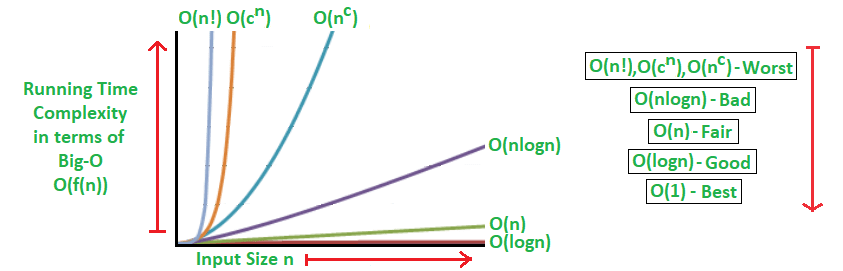
